<a href="https://colab.research.google.com/github/namanbansal2710/DataDiction/blob/main/Another_copy_of_AI_Foundations_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/file/d/1XoIqZCbHlhBF8RmiTYW808cKUuPLOYWz/view?usp=sharing

## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [243]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE TOY DATASET

In [244]:
!gdown --id 1CSu4Ha0-89LrQNiIUitRrdssN07i67tB --output heights.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CSu4Ha0-89LrQNiIUitRrdssN07i67tB
To: /content/heights.csv
100% 3.73k/3.73k [00:00<00:00, 18.7MB/s]


### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [245]:
df = pd.read_csv('./heights.csv')

In [246]:
df.head()

,Index,Height (Inches),Weight (Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


#### Visualize your data

It is often useful to understand the data by visualizing it.
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (height and weight).
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


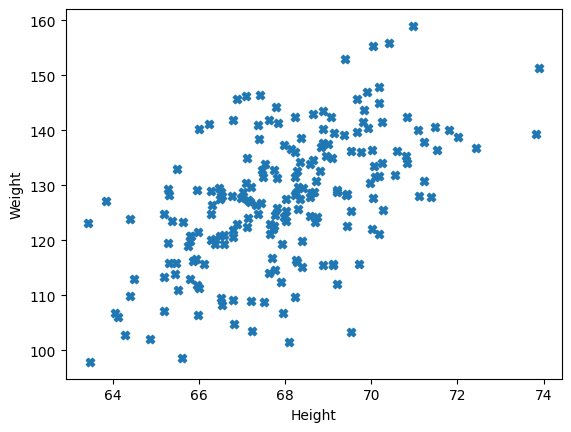

In [247]:
import matplotlib.pyplot as plt

plt.scatter(df[' Height (Inches)'], df[' Weight (Pounds)'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [248]:
X_train = np.array(df[' Height (Inches)'])
y_train = np.array(df[' Weight (Pounds)'])
X_train = np.expand_dims(X_train, -1)

<a name="4"></a>
##  Refresher on linear regression

In this, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (Height) to `y` (Weight) is represented as
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**.
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (Height) and output a prediction $f_{w,b}(x)$ (Weight).

##  Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ model's prediction for weight, as opposed to $y^{(i)}$, which is the actual weight that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$


### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [257]:

class LinearRegression:



    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields
        self.weights = None
        self.bias = None


        self.loss_history = []

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        global X_train,y_train
        X_mean = X_train.mean(axis=0)
        X_std = X_train.std(axis=0)
        X_std[X_std == 0] = 1
        X_train = (X_train - X_mean) / X_std
        y_mean = y_train.mean()
        y_std = y_train.std() if y_train.std() != 0 else 1
        y_train = (y_train - y_mean) / y_std


        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            self.update_weights(X, y)
            y_pred = self.predict(X)
            loss = np.mean(np.square(y_pred - y))
            self.loss_history.append(loss)



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        n_samples = X.shape[0]
        y_pred = self.predict(X)
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (2 / n_samples) * np.sum(y_pred - y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        return np.dot(X, self.weights) + self.bias



### Build the model and train on the dataset.

In [259]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [260]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    error = y_pred - y_actual
    squared_error = np.square(error)
    mse = np.mean(squared_error)
    return mse



### Make predictions using the model and evaluate it.

In [261]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.6899


### Plot the predicted and the actual values.

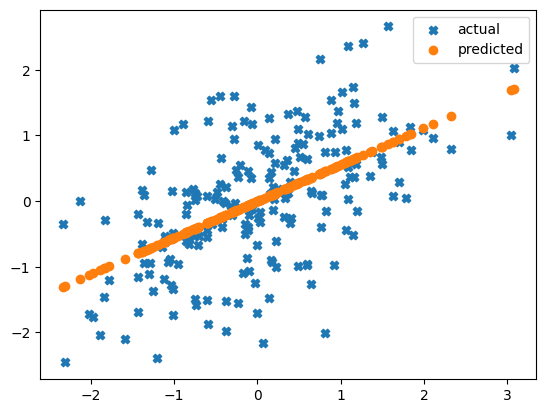

In [262]:
import matplotlib.pyplot as plt


plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.
Run the below cell to import the dataset in your collab notebook

In [263]:
!gdown --id 1XoIqZCbHlhBF8RmiTYW808cKUuPLOYWz --output advertise.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XoIqZCbHlhBF8RmiTYW808cKUuPLOYWz
To: /content/advertise.csv
100% 5.17k/5.17k [00:00<00:00, 22.2MB/s]


In [265]:
df = pd.read_csv('./advertise.csv')

In [266]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [267]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### Split the data into train and test set.

In [268]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [269]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [270]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [275]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [276]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 0.1043
Test MSE: 14007.6588


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.


###2.1 Data Preparation and visualization
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [165]:
df = pd.read_csv('./heights.csv')
df.head()
df.columns

Index(['Index', ' Height (Inches)', ' Weight (Pounds)'], dtype='object')

In [166]:
#splitting our data into X_train and y_train
X_train = np.array(df[' Height (Inches)'])
y_train = np.array((df[' Weight (Pounds)'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [167]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[65.78]
 [71.52]
 [69.4 ]
 [68.22]
 [67.79]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [168]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [169]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (200, 1)
The shape of y_train is: (200,)
We have m = 200 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the x axes is the weight and y axes the wight criteria.

ValueError: x and y must be the same size

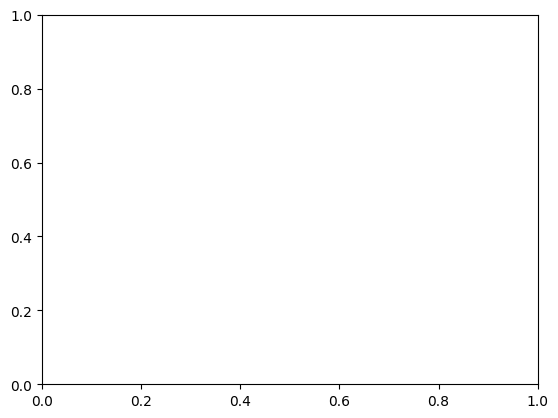

In [277]:
plt.scatter(X_train, y_train)
plt.ylabel('Weight criteria')
plt.xlabel('Height')
plt.show()

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

### 2.2  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that
- `z` is not always a single number, but can also be an array of numbers.
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

### 2.3 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form

$$
J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]
\tag{1}
$$

where
* $m$ is the number of training examples in the dataset

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is

$$
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) =
- y^{(i)} \log\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right)
- \left(1 - y^{(i)}\right)\log\left(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right)
\tag{2}
$$

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w}\cdot \mathbf{x}^{(i)} + b)$ where $g$ is the sigmoid function.
  * It might be helpful to first calculate an intermediate variable
  $$
  z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w}\cdot \mathbf{x}^{(i)} + b
  $$
  before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$.

Note:
* `X_train` and `y_train` are matrices of shape $(m, n)$ and $(m, 1)$ respectively, where $n$ is the number of features and $m$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.


### Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, you can use the sigmoid function that you implemented above and if you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

### 2.4 Learning parameters using gradient descent

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [191]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def sigmoid(self, z):
      return 1 / (1 + np.exp(-z))


    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0
        for _ in range(self.epochs):
          self.update_weights(X, y)



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db





    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        z = np.dot(X, self.weights) + self.bias
        probs = self.sigmoid(z)
        predictions = (probs >= 0.5).astype(int)
        return predictions.flatten()




### Build the model and train on the dataset.

In [192]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (20 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [193]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    return np.mean(y_pred == y_actual)



### Make predictions using the model and evaluate it.

In [194]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

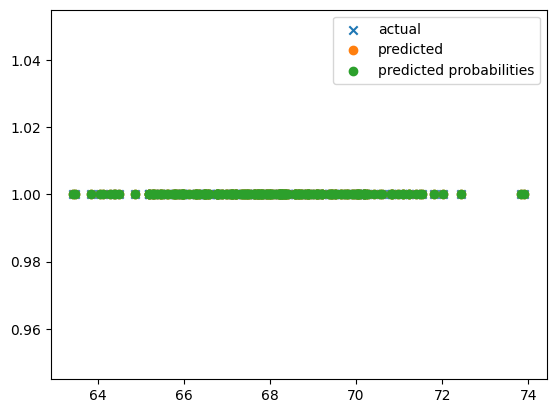

In [195]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()